# Import & Read CSVs #

In [1]:
import pandas as pd
pd.set_option('max_row', None)
pd.set_option('max_columns', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

import numpy as np
from scipy import stats

from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time, urllib.request
import requests

import re
from collections import Counter

In [2]:
followerDF = pd.read_csv("./dataset/MSF/Instagram_Follower_Collector/result.csv")
followingDF = pd.read_csv("./dataset/MSF/Instagram_Following_Collector/result.csv")
postDF = pd.read_csv("./dataset/MSF/Instagram_Posts_Extractor/result.csv")
profileDF = pd.read_csv("./dataset/MSF/Instagram_Profile_Scraper/result.csv")
taggedpostDF = pd.read_csv("./dataset/MSF/Instagram_Tagged_Posts_Extractor/result.csv")
commentDF = pd.read_csv("./dataset/MSF/Instagram_Post_Commenters/result.csv")


In [3]:
print("\nProfile")
display(profileDF.head())

print("Followerers")
display(followerDF.head())

print("\nFollowerings")
display(followingDF.head())

print("\nPosts")
display(postDF.head())

print("\nTagged Posts")
display(taggedpostDF.head())

print("\nComments")
display(commentDF.head())


Profile


,profileUrl,publicEmail,contactPhoneNumber,profileName,fullName,bio,blockedByViewer,followersCount,followingCount,followedByViewer,followsViewer,instagramID,isBusinessAccount,joinedRecently,businessCategory,isPrivate,isVerified,mutualFollowersCount,imageUrl,requestedByViewer,postsCount,website,query,timestamp
0,https://www.instagram.com/msfcares/,NaN,NaN,msfcares,MSF Singapore,"👨‍👩‍👧‍👦💞 Nurturing resilient individuals, strong families and a caring society\n📲 Stay connected with us on Telegram ⤓",False,11801,42,False,False,1993519912,True,False,Government Agencies,False,True,3,https://scontent-lga3-1.cdninstagram.com/v/t51.2885-19/275633696_374371394693089_7133785662905060088_n.jpg?stp=dst-jpg_s320x320&_nc_ht=scontent-lga3-1.cdninstagram.com&_nc_cat=101&_nc_ohc=5bep5YQmbcAAX_3O-VK&edm=ABfd0MgBAAAA&ccb=7-4&oh=00_AT9UK8-E8zdTGMjd_XcgFVJTV_T8idP9VniTtOR9dWBMhA&oe=623F868C&_nc_sid=7bff83,False,380,https://t.me/msfcares,https://www.instagram.com/msfcares/,2022-03-22T06:04:42.742Z


Followerers


,profileUrl,username,fullName,imgUrl,id,isPrivate,isVerified,query,timestamp
0,https://www.instagram.com/modestisthekey,modestisthekey,Tudung Sg,https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-19/275028252_751117919189732_6203028102311627352_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=108&_nc_ohc=7M4jBcac6_IAX_TxU6T&edm=APQMUHMBAAAA&ccb=7-4&oh=00_AT95usN7HbHKfbl1-zq4pVTRV6GBf_8rxkNYsm2xaomaMw&oe=6240B407&_nc_sid=e5d0a6,50558672606,False,False,https://www.instagram.com/msfcares/,2022-03-23T00:55:59.684Z
1,https://www.instagram.com/ivyy1971,ivyy1971,ivy koh,https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-19/128863213_381660019562119_1879679823904745484_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=107&_nc_ohc=zbUU6estic8AX9DkSrH&edm=APQMUHMBAAAA&ccb=7-4&oh=00_AT9BlzLogntMAW4Rr0NMMk4gkboJ9GELgGzYxf1_ifrfAQ&oe=62411963&_nc_sid=e5d0a6,1958531208,False,False,https://www.instagram.com/msfcares/,2022-03-23T00:55:59.684Z
2,https://www.instagram.com/safan_faiz,safan_faiz,~صفان فايز~,https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-19/277114181_4768108479909640_1665951273109521906_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=104&_nc_ohc=s6lr3g03_XEAX-i4SW7&edm=APQMUHMBAAAA&ccb=7-4&oh=00_AT-NmbGFJnvpNGocFax7aj0AEyCFAqyHGuKO8q1EeuaWcw&oe=62408BCA&_nc_sid=e5d0a6,47406120089,False,False,https://www.instagram.com/msfcares/,2022-03-23T00:55:59.684Z
3,https://www.instagram.com/giftaword,giftaword,Gift A Word,https://scontent-cdt1-1.cdninstagram.com/v/t51.2885-19/240493852_884787985460866_4906217323402152773_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-cdt1-1.cdninstagram.com&_nc_cat=110&_nc_ohc=AKaUplONOVsAX-5ijIf&edm=APQMUHMBAAAA&ccb=7-4&oh=00_AT-oorkMvka-ptae7AXEDC5AzDdt81JrU9MfyGmJ4mCT_g&oe=6241134F&_nc_sid=e5d0a6,4481700654,False,False,https://www.instagram.com/msfcares/,2022-03-23T00:55:59.684Z
4,https://www.instagram.com/mz0061,mz0061,Muhammad Azhari,https://scontent-cdt1-1.cdninstagram.com/v/t51.2885-19/255030442_315458790409018_1741522761683212506_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-cdt1-1.cdninstagram.com&_nc_cat=110&_nc_ohc=QNW-Xieb6t8AX80fysE&edm=APQMUHMBAAAA&ccb=7-4&oh=00_AT_KoBIEslspR8ugkRQSxIRK0woY-MlCPHW_YxFS0lVPyA&oe=62420300&_nc_sid=e5d0a6,628083294,True,False,https://www.instagram.com/msfcares/,2022-03-23T00:55:59.684Z



Followerings


,profileUrl,username,fullName,imgUrl,id,isPrivate,isVerified,query,timestamp
0,https://www.instagram.com/ericchuasl.sg,ericchuasl.sg,Eric Chua,https://scontent-vie1-1.cdninstagram.com/v/t51.2885-19/276971213_3263009203934186_2354862237101542290_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-vie1-1.cdninstagram.com&_nc_cat=102&_nc_ohc=tw9iKI6FerYAX-tjcXP&edm=ALB854YBAAAA&ccb=7-4&oh=00_AT8wVG0K6Zqe2f9T5-m6MxCD8graWwM2zj7v5m_F_lbjiw&oe=6241191D&_nc_sid=04cb80,197051779,False,True,https://www.instagram.com/msfcares/,2022-03-22T05:50:29.596Z
1,https://www.instagram.com/sun.xueling,sun.xueling,Sun Xueling 孙雪玲,https://scontent-vie1-1.cdninstagram.com/v/t51.2885-19/272481525_1283204822178899_2566605892199497129_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-vie1-1.cdninstagram.com&_nc_cat=111&_nc_ohc=n06MeUOAwigAX_vpRUJ&edm=ALB854YBAAAA&ccb=7-4&oh=00_AT_Pcrm05bYVTocTjNPaWl6KsLDRXEHvmms6uoxknkPwiQ&oe=62409C7A&_nc_sid=04cb80,39249403715,False,True,https://www.instagram.com/msfcares/,2022-03-22T05:50:29.596Z
2,https://www.instagram.com/masagosz,masagosz,Masagos Zulkifli,https://scontent-vie1-1.cdninstagram.com/v/t51.2885-19/275798079_7160998327307408_8396421702101019325_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-vie1-1.cdninstagram.com&_nc_cat=108&_nc_ohc=BtoOj2aZCTgAX_CKIhG&edm=ALB854YBAAAA&ccb=7-4&oh=00_AT9-hl84SkdceRIyY-8MZneL-g7xPevVPjWeb-8BXzQB3Q&oe=62402DB8&_nc_sid=04cb80,242298165,False,True,https://www.instagram.com/msfcares/,2022-03-22T05:50:29.596Z
3,https://www.instagram.com/presidentschallengesg,presidentschallengesg,President's Challenge,https://scontent-vie1-1.cdninstagram.com/v/t51.2885-19/151106329_767402927511959_5541904872450112515_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-vie1-1.cdninstagram.com&_nc_cat=111&_nc_ohc=fzAbN_wYaPEAX_4aVrV&edm=ALB854YBAAAA&ccb=7-4&oh=00_AT9UpOyzJxDJ7bZvEZXefWqIL91pyw4mclngWZR-ktnA9Q&oe=624026C4&_nc_sid=04cb80,39994823658,False,True,https://www.instagram.com/msfcares/,2022-03-22T05:50:29.596Z
4,https://www.instagram.com/govtechsg,govtechsg,GovTech (Singapore),https://scontent-vie1-1.cdninstagram.com/v/t51.2885-19/14482166_102972783506289_329393810868011008_a.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-vie1-1.cdninstagram.com&_nc_cat=109&_nc_ohc=tUFBhnMpJy0AX--PG0U&edm=ALB854YBAAAA&ccb=7-4&oh=00_AT_bpA2U50bGIT46bwyZQCRBFbFg0UEU1VCG_a7bEK6rCw&oe=623F6E27&_nc_sid=04cb80,2060549653,False,True,https://www.instagram.com/msfcares/,2022-03-22T05:50:29.596Z



Posts


,postUrl,description,commentCount,likeCount,pubDate,likedByViewer,isSidecar,type,profileUrl,username,fullName,imgUrl,postId,timestamp,query,videoUrl,viewCount,taggedFullName1,taggedUsername1,taggedFullName2,taggedUsername2,location,locationId,taggedFullName3,taggedUsername3,taggedFullName4,taggedUsername4,taggedFullName5,taggedUsername5
0,https://www.instagram.com/p/CbWgkYuBvN_/,"It’s World Down Syndrome Day, and this year, we reflect on what #InclusionMeans. To Chun Ru and Zhuo Ying, that means accepting them for who they are, and enabling them to contribute to society in their own ways. \n\nLet’s celebrate this special day together! Tell us what inclusion means to you too #InclusiveSG",2,69,2022-03-21T04:00:59.000Z,False,True,Photo,https://www.instagram.com/msfcares,msfcares,MSF Singapore,https://scontent-vie1-1.cdninstagram.com/v/t51.2885-15/276032167_2814259892207294_4249570654312457781_n.jpg?stp=dst-jpg_e15_fr_s1080x1080&_nc_ht=scontent-vie1-1.cdninstagram.com&_nc_cat=102&_nc_ohc=ovcUxr-ZlTkAX9ZTryq&edm=AABBvjUBAAAA&ccb=7-4&ig_cache_key=Mjc5ODU2NzQ1MTA5NTY2MzY5NQ%3D%3D.2-ccb7-4&oh=00_AT_xW6LkyswbpCPMoZGKro7_KqMm_A8-Op1jts1W55xGEQ&oe=6241460A&_nc_sid=83d603,2798567451095663695_1993519912,2022-03-22T06:07:20.924Z,https://www.instagram.com/msfcares/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/CbWgkYuBvN_/,"It’s World Down Syndrome Day, and this year, we reflect on what #InclusionMeans. To Chun Ru and Zhuo Ying, that means accepting them for who they are, and enabling them to contribute to society in their own ways. \n\nLet’s celebrate this special day together! Tell us what inclusion means to you too #InclusiveSG",2,69,2022-03-21T04:00:59.000Z,False,True,Photo,https://www.instagram.com/msfcares,msfcares,MSF Singapore,https://scontent-vie1-1.cdninstagram.com/v/t51.2885-15/276088635_919636468716632_1640420364802585774_n.jpg?stp=dst-jpg_e15_fr_s1080x1080&_nc_ht=scontent-vie1-1.cdninstagram.com&_nc_cat=108&_nc_ohc=G3jomcGK7S0AX-cYv1j&edm=AABBvjUBAAAA&ccb=7-4&ig_cache_key=Mjc5ODU2NzQ1MTA5NTU5ODEyMQ%3D%3D.2-ccb7-4&oh=00_AT-KbQOR464SR6K_sTNVsDp9YykShLudO7BmHrj0hmYhaQ&oe=623FEA0E&_nc_sid=83d603,2798567451095598121_1993519912,2022-03-22T06:07:20.924Z,https://www.instagram.com/msfcares/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/p/CbJcPjVJS9e/,"Our colleagues at Child Protective Service (CPS) work with families to ensure the safety and well-being of children and young persons. At the same time, they bring in community partners, who support families in rebuilding relationships between parents and their children. Madam Leona, a former CPS client, shares candidly about her parenting journey and struggles, and how her relationship with her children improved when she accepted help.\n\n#TheCareFactor",0,114,2022-03-16T02:14:17.000Z,False,False,Video,https://www.instagram.com/msfcares,msfcares,MSF Singapore,https://scontent-vie1-1.cdninstagram.com/v/t51.2885-15/275801921_1965786260267945_2592920273859808175_n.jpg?stp=dst-jpg_e15_p640x640&_nc_ht=scontent-vie1-1.cdninstagram.com&_nc_cat=105&_nc_ohc=8mY9fWCZRJ8AX-RpMiJ&edm=AABBvjUBAAAA&ccb=7-4&ig_cache_key=Mjc5NDg4OTI1Nzc5MDI4NzcxMA%3D%3D.2-ccb7-4&oh=00_AT9q37JCLAupWW7SLY7Xv2_lOH7qPJvgwxoclfWdnHSFQg&oe=62401236&_nc_sid=83d603,2794889257790287710_1993519912,2022-03-22T06:07:21.158Z,https://www.instagram.com/msfcares/,https://scontent-vie1-1.cdninstagram.com/v/t50.16885-16/10000000_489764759483881_910125951326447671_n.mp4?efg=eyJ2ZW5jb2RlX3RhZyI6InZ0c192b2RfdXJsZ2VuLjEyODAuaWd0di5kZWZhdWx0IiwicWVfZ3JvdXBzIjoiW1wiaWdfd2ViX2RlbGl2ZXJ5X3Z0c19vdGZcIl0ifQ&_nc_ht=scontent-vie1-1.cdninstagram.com&_nc_cat=101&_nc_ohc=0SG9Jun0xnkAX9L2T4X&edm=AABBvjUBAAAA&vs=17984015509476233_1825447438&_nc_vs=HBksFQAYJEdJQ1dtQURwTllNX2NMMEJBRGRvclEyN2FxRU1idlZCQUFBRhUAAsgBABUAGCRHREROY0JCblJnUmlWRndDQURHNkRIQVBKUWhoYnZWQkFBQUYVAgLIAQAoABgAGwGIB3VzZV9vaWwBMRUAACbwlPeLwuvtPxUCKAJDMywXQG77tkWhysEYEmRhc2hfYmFzZWxpbmVfMV92MREAdewHAA%3D%3D&ccb=7-


Tagged Posts


,postUrl,profileUrl,username,likeCount,commentCount,caption,pubDate,description,location,locationId,type,taggedFullName1,taggedUsername1,taggedFullName2,taggedUsername2,taggedFullName3,taggedUsername3,taggedFullName4,taggedUsername4,id,timestamp,query,taggedFullName5,taggedUsername5,taggedFullName6,taggedUsername6,taggedFullName7,taggedUsername7,viewCount,taggedFullName8,taggedUsername8,taggedFullName9,taggedUsername9,taggedFullName10,taggedUsername10,taggedFullName11,taggedUsername11,taggedFullName12,taggedUsername12,taggedFullName13,taggedUsername13,taggedFullName14,taggedUsername14,taggedFullName15,taggedUsername15,taggedFullName16,taggedUsername16,taggedFullName17,taggedUsername17,taggedFullName18,taggedUsername18,taggedFullName19,taggedUsername19,taggedFullName20,taggedUsername20
0,https://www.instagram.com/p/CaYtZaWszcg/,https://www.instagram.com/amkfsccommunityservices,amkfsccommunityservices,21,1,NaN,2022-02-25T04:00:11.000Z,"Life has not been easy for single mother Lynn, who singlehandedly cares for a child with special needs. Despite her struggles, the 55-year-old bears a strong passion for supporting the community, and devotes her time to caring for underprivileged neighbours!\n\nSwipe to read about the challenges Lynn faces as a single mother, and how she finds the strength to cultivate a culture of support and care in her community in this week’s #SingleParentHeroes 🦸🏽‍♀️ story!\n\nAt AMKFSC Community Services, we believe in empowering the strengths of single parents like Lynn by providing them with the right care and support. As we explore initiatives to better support this community, this series celebrates our single parent beneficiaries in line with the Support for Single Parents focus area of the Alliance for Action to Strengthen Marriages and Family Relationships by MSF Singapore (@msfcares). 🦸🏽‍♀️",NaN,NaN,Photo,NCSS Singapore,ncss.sg,MSF Singapore,msfcares,MSF Singapore,msfsingapore,NVPC - Towards a City of Good,cityofgoodsg,2781172428279330592_48301961252,2022-03-22T12:44:52.090Z,https://www.instagram.com/msfcares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/CaYTD-7PVyO/,https://www.instagram.com/leebelinda,leebelinda,5183,133,"Photo shared by Belinda Lee 李心钰 on February 24, 2022 tagging @familiesforlife, and @msfcares. May be an image of one or more people and outdoors.",2022-02-25T00:10:03.000Z,"A happy marriage is not so much how compatible you are but how you deal with incompatibility during times of trouble and conflicts. 👩🏻‍❤️‍💋‍👨🏼🤍\n\nIt is inevitable for David and I to have disagreements sometimes but it is how we resolve them that matters. 10% of conflicts are due to difference of opinions. 90% are due to the hostility of voice and passive aggressive body language. \n\nHere are 5 simple but effective ways on how we try to resolve our marriage conflicts......\n\n1) Give each other a chance to talk uninterrupted.\n2) Listen to each other without judgement.\n3) Use affirming words like "" I feel...."" and "" I hear you"" instead of "" You are always like that.""\n4) Pray together.\n5) Don't be afraid to say the magic words...."" I'm sorry and I love you!""😌\n\nBut if you are facing deeper relationship or family issues, I will strongly encourage you to seek professional help as early as you can.\n\nThe Ministry of Social and Family Development, @msfcares has worked with the Community Psychology Hub (CPH) to provide an online counselling service for people facing marital, divorce, parenting, and/or family issues.\n\nYou can access CPH’s online counselling service through the new Family Assist portal (https:// go.gov.sg/onlinecounselling). This portal also provides information, resources and tips on decision making processes, not just for divorce, but also for reconciliation, or strengthening your marriage.\n\nMarriage is about being a team. The harder you work together to make your marri


Comments


,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,error
0,https://scontent-lga3-1.cdninstagram.com/v/t51.2885-19/275093863_340054478072010_6613421893956269588_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-lga3-1.cdninstagram.com&_nc_cat=106&_nc_ohc=VRoyWtxoBxEAX8J2Ufs&edm=AId3EpQBAAAA&ccb=7-4&oh=00_AT_uAhKsZLgG2V6oxX7KqcbT-pYXDPAogD65G7rAv_o5tQ&oe=624023E8&_nc_sid=705020,vitagenqueen,https://www.instagram.com/vitagenqueen,Adorable girls 😍,0.0,0.0,2022-03-21T04:59:28.000Z,1.795586e+16,3.694427e+08,2022-03-22T13:06:15.503Z,https://www.instagram.com/p/CbWgkYuBvN_/,NaN
1,https://scontent-lga3-1.cdninstagram.com/v/t51.2885-19/271677069_354793872874570_1961086339467512672_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-lga3-1.cdninstagram.com&_nc_cat=110&_nc_ohc=Nzo7UT07M6YAX9mJYjM&edm=AId3EpQBAAAA&ccb=7-4&oh=00_AT_VHv0CaHWBaukfiVsjfWZz1gwNFM09aqWipw2C4EIBgQ&oe=62414428&_nc_sid=705020,pioneerresponders,https://www.instagram.com/pioneerresponders,We are all humans too ❤️,0.0,0.0,2022-03-21T04:14:04.000Z,1.802295e+16,4.676966e+10,2022-03-22T13:06:15.503Z,https://www.instagram.com/p/CbWgkYuBvN_/,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T13:06:16.129Z,https://www.instagram.com/p/CbJcPjVJS9e/,No comments found
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T13:06:16.375Z,https://www.instagram.com/p/CbHTInSpf7l/,No comments found
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T13:06:16.744Z,https://www.instagram.com/p/Ca6mRkdpaZJ/,No comments found


In [4]:
postDF_gb = postDF.groupby(['postUrl', 'type'])

postDB_size = postDF_gb.size().reset_index(name = "count") 
postDB_size_duplicate = postDB_size[postDB_size.duplicated(keep=False, subset=['postUrl'])]
postDB_size_unique = postDB_size.drop_duplicates(subset=['postUrl'], keep=False)
postDF_agg = postDF_gb.agg({'likeCount': 'mean', 'viewCount': 'mean'}).rename(columns={'likeCount': 'likeMean','viewCount': 'viewMean'}).reset_index()

df_post_unique = postDF_agg[postDF_agg['postUrl'].isin(postDB_size_unique['postUrl'])].groupby(['type']).agg({'likeMean': 'mean', 'viewMean': 'mean'}).reset_index()
df_post_duplicate = postDF_agg[postDF_agg['postUrl'].isin(postDB_size_duplicate['postUrl'])].groupby(['type']).agg({'likeMean': 'mean', 'viewMean': 'mean'}).reset_index()

df_uniquePhoto = df_post_unique.loc[df_post_unique['type'] == 'Photo']
df_uniqueVideo = df_post_unique.loc[df_post_unique['type'] == 'Video']
df_hybrid = df_post_duplicate.loc[df_post_unique['type'] == 'Video']

# postDF_gb_overall = postDF_gb.size().to_frame(name='counts')
# postDF_gb_overall.join(postDF_gb.agg({'likeCount': 'mean'}).rename(columns={'likeCount': 'likeMean'})).join(postDF_gb.agg({'viewCount': 'mean'}).rename(columns={'viewCount': 'viewMean'})).reset_index()

In [5]:

df_uniquePhoto['likeMean'].values[0]
df_uniqueVideo['likeMean'].values[0]
df_uniqueVideo['viewMean'].values[0]

df_hybrid['likeMean'].values[0]
df_hybrid['viewMean'].values[0]


291.5

# Statistics #
1. send all comments to sentimental analysis (DONE)
2. word cloud on caption
3. timeseries chart-hastag, likes, content(post)
4. statistics (follower/followering, avg media per post, number of photo, video) (DONE)
5. Users that like each posts (% of them followering) (DONE)
6. tagged post (DONE-semi)

In [6]:
# Helper Functions

def getFolloweringPercentage(arr1, arr2):
    count = 0
    count_arr = []
    
    for followering in arr1:
        if (followering in arr2):
            count += 1
            count_arr.append(followering)
    return count, count_arr

def getHashtag(arr):
    
    result = []
    
    for each_sentence in arr:
        result.extend(re.findall(r"#(\w+)", each_sentence))
    
    return result

def getHashtagdict(arr, unique):
    result = {}
    for word in unique:
        result[word] = arr.count(word)
    return result

In [7]:
# Store useful infomation in dictionary
statsDictionary = {}
statsDictionary["follower"] = followerDF["username"].unique().tolist()
statsDictionary["followerVerified"] = followerDF[followerDF["isVerified"]]["username"].unique().tolist()
statsDictionary["followerPrivate"] = followerDF[followerDF["isPrivate"]]["username"].unique().tolist()

statsDictionary["followering"] = followingDF["username"].unique().tolist()
statsDictionary["followeringVerified"] = followingDF[followingDF["isVerified"]]["username"].unique().tolist()
statsDictionary["followeringPrivate"] = followingDF[followingDF["isPrivate"]]["username"].unique().tolist()

statsDictionary["commentUser"] =  commentDF[commentDF["username"].notna()]["username"].unique().tolist()

statsDictionary["postHashtag"] =  getHashtag(postDF[postDF["description"].notna()]["description"].tolist())

In [ ]:
# Testing
commentDF[commentDF["username"].notna()]["username"].unique().tolist()

In [8]:
print("MFS Statistics")

# Followers statistics
print(f"Followers count: {len(statsDictionary['follower'])}")
print(f"Verified Followers count: {len(statsDictionary['followerVerified'])}, {len(statsDictionary['followerVerified'])/len(statsDictionary['follower'])*100:.2f}%")
print(f"Private Followers count: {len(statsDictionary['followerPrivate'])}, {len(statsDictionary['followerPrivate'])/len(statsDictionary['follower'])*100:.2f}%")
print("\n----------------------------------------------\n")

# Followerings statistics
print(f"Followings count: {len(statsDictionary['followering'])}")
print(f"Verified Followings count: {len(statsDictionary['followeringVerified'])}, {len(statsDictionary['followeringVerified'])/len(statsDictionary['followering'])*100:.2f}%")
print(f"Private Followings count: {len(statsDictionary['followeringPrivate'])}, {len(statsDictionary['followeringPrivate'])/len(statsDictionary['followering'])*100:.2f}%")
print("\n----------------------------------------------\n")

# Friends statistics
friendsCount, friends_arr = getFolloweringPercentage(statsDictionary["followering"], statsDictionary["follower"])
statsDictionary["friends"] = friends_arr
vfriendsCount, vfriendsCountArr = getFolloweringPercentage(friends_arr, statsDictionary['followeringVerified'])
print(f'Friends (account that follows each other): {friendsCount}, {friendsCount/len(statsDictionary["followering"])*100:.2f}%')
print(f'Verified Friends: {vfriendsCount}, {vfriendsCount/friendsCount*100:.2f}%')
print(vfriendsCountArr)
print("\n----------------------------------------------\n")

# Posts statistics
print(f'Total posts: {len(postDF["postUrl"].unique())}')
print(f'Average media per post: {len(postDF)/len(postDF["postUrl"].unique())}')
total_image = len(postDF[postDF["type"] == "Photo"])
total_video = len(postDF[postDF["type"] == "Video"])
print(f'Images count: {total_image}, {total_image/(total_image+total_video)*100:.2f}%')
print(f'Videos count: {total_video}, {total_video/(total_image+total_video)*100:.2f}%')

print(f"Posts (Only Photos): {len(postDB_size_unique[postDB_size_unique['type'] == 'Photo'])}, {len(postDB_size_unique[postDB_size_unique['type'] == 'Photo'])/len(postDF['postUrl'].unique()) * 100 :.2f}%")
display(df_uniquePhoto)
print(f"Posts (Only Videos): {len(postDB_size_unique[postDB_size_unique['type'] == 'Video'])}, {len(postDB_size_unique[postDB_size_unique['type'] == 'Video'])/len(postDF['postUrl'].unique()) * 100 :.2f}%")
display(df_uniqueVideo)
print(f"Posts (hybrid): {len(postDB_size_duplicate['postUrl'].unique())}, {len(postDB_size_duplicate['postUrl'].unique())/len(postDF['postUrl'].unique()) * 100 :.2f}%")
display(df_hybrid)
print("\n----------------------------------------------\n")

# Comments statistics
print(f'Total comments: {commentDF["username"].notna().sum()}')
print(f'Average comments/post: {commentDF["username"].notna().sum() / len(postDF["postUrl"].unique())}')
commentFriends, commentFriends_arr = getFolloweringPercentage(statsDictionary["commentUser"], statsDictionary["follower"])
print(f'% commenters/followers: {commentFriends}')

print(getFolloweringPercentage(commentFriends_arr,friends_arr))
print(getFolloweringPercentage(commentFriends_arr,statsDictionary['followerVerified']))
print(getFolloweringPercentage(commentFriends_arr,statsDictionary['followerPrivate']))
print("\n----------------------------------------------\n")


print(f'\nTotal Hashtag (non-unique): {len(statsDictionary["postHashtag"])}')
print(f'Average Hashtag per post: {len(statsDictionary["postHashtag"]) / len(postDF["postUrl"].unique())}')
print(f'Total Hashtag (unique): {len(set(statsDictionary["postHashtag"]))}')
print(f'Reusability rate: {len(statsDictionary["postHashtag"]) / len(set(statsDictionary["postHashtag"]))}')


print("\n----------------------------------------------\n")
print(f'Tagged posts: {len(taggedpostDF)}')

MFS Statistics
Followers count: 11803
Verified Followers count: 75, 0.64%
Private Followers count: 6470, 54.82%

----------------------------------------------

Followings count: 42
Verified Followings count: 37, 88.10%
Private Followings count: 0, 0.00%

----------------------------------------------

Friends (account that follows each other): 22, 52.38%
Verified Friends: 20, 90.91%
['ericchuasl.sg', 'sun.xueling', 'masagosz', 'presidentschallengesg', 'foodfromtheheartsg', 'gov.sg', 'ncpg.singapore', 'beanstalksingapore', 'mndsingapore', 'psdsingapore', 'motsingapore', 'mof_sg', 'desmond.lee', 'singaporemci', 'muhammadfaishalibrahim', 'comchestsg', 'ncss.sg', 'familiesforlife', 'chuanjin1', 'mccysg']

----------------------------------------------

Total posts: 380
Average media per post: 1.9947368421052631
Images count: 629, 82.98%
Videos count: 129, 17.02%
Posts (Only Photos): 274, 72.11%


,type,likeMean,viewMean
0,Photo,60.868613,NaN


Posts (Only Videos): 104, 27.37%


,type,likeMean,viewMean
1,Video,38.596154,532.125


Posts (hybrid): 2, 0.53%


,type,likeMean,viewMean
1,Video,69.5,291.5



----------------------------------------------

Total comments: 116
Average comments/post: 0.30526315789473685
% commenters/followers: 46
(0, [])
(2, ['boystownsg', 'daughtersoftomorrow'])
(19, ['limyookgweek', 'msparoxysm', 'merci_yah', 'opiates73', 'rabianasirmahmood', 'allieinthejingy', 'princesskool', 'cadenchen0809', 'sonofagn', 'starreyniqhtss', 'nookeechoa', 'ak_786743', 'simon534633', 'thisishaoyudoit', 'lindameizhen', 'gohyta', 'sophia_angchan', 'l_sin_communaute', 'ahlamalhammadi'])

----------------------------------------------


Total Hashtag (non-unique): 1283
Average Hashtag per post: 3.376315789473684
Total Hashtag (unique): 287
Reusability rate: 4.470383275261324

----------------------------------------------

Tagged posts: 733


In [9]:
# Hashtag from posts
sorted_hashtag = sorted(statsDictionary["postHashtag"], key=Counter(statsDictionary["postHashtag"]).get, reverse=True)
unique_hashtag = list(dict.fromkeys(sorted_hashtag))
hashtag_dict = getHashtagdict(statsDictionary["postHashtag"],unique_hashtag)

hashtagDF = pd.DataFrame(hashtag_dict.items(), columns = ["Hashtag", "Count"])
hashtagDF.head(10)

,Hashtag,Count
0,InclusiveSG,84
1,CelebratingSGWomen,68
2,MSFCares,62
3,LetsMeet,55
4,SGCares,42
5,SGUnited,37
6,SingaporeTogether,32
7,msfcares,29
8,SGTogether,21
9,SeetheTrueMe,21


In [10]:
taggedpostDF.loc[:,['username','likeCount','commentCount','description','postUrl']].sort_values(by=['likeCount'], ascending=False).head()

,username,likeCount,commentCount,description,postUrl
47,thejianhaotan,45452,122,"Family violence comes in many forms such as emotional and psychological abuse, sexual abuse and neglect. Some are so subtle that the victims themselves may not realize that they are in one. But the truth is, family violence is real, there are indeed people suffering in silence, and we need to start acknowledging and fighting against it. \n\nI’ve partnered up with the Ministry of Social and Family Development to raise awareness for the Break The Silence campaign, and encourage bystanders to lend a helping hand and encourage victims to seek help if they know of anyone suffering from family violence. \n\nIf you’re going through family violence, swipe right to find out more on how you can discreetly use the Signal for Help, and how you can respond when you spot others performing the signal. \n\n#BreaktheSilence \n#SignalforHelp \n#FamilyViolence",https://www.instagram.com/p/CW24bX3pVRz/
190,joannepeh,18346,74,"There’re many possible triggers for marital disagreements and my husband and I too have our fair share. While we don’t always agree, our key to resolution is to always listen — it may not happen instantly, especially when tempers flare, but deep in our hearts we know we want to work towards that goal and so on our own we’ll find our way there. Once we’re calm, we can then have a proper conversation. \n\nFor some couples, it can be hard to be objective and take a step back when tensions mount. That’s why the Ministry of Social and Family Development @msfcares has partnered with Community Psychology Hub (CPH) to provide online counselling service for those who may be facing marital and parenting stress. It’s completely free-of-charge and allows for anonymous sign ups. When we address issues early and identify the root cause, we prevent any emotions, that may be irrelevant to the original problem from escalating to a point where resolution becomes impossible. \n\nIf you’d like someone to talk to or know someone who needs help, head on over to www.cphonlinecounselling.sg!\n\n@familiesforlife #IChooseFamilyTime #CPHonlinecounselling #SingaporeTogether #StrongerAsOneSG",https://www.instagram.com/p/CNZo9G4pe-G/
245,zoetay10,6430,103,"❤️❤️🧓🧓🧓🙏🙏😍😍\nShe Who Is All Of Us \n\nA woman figure whom I look up to is definitely my mom. Apart from her work, she didn’t have anyone to help her with house chores, and had to raise my siblings and I all on her own. Yet, she never once complained about it. \n\nNow that I am a mother too, I can fully understand how difficult those days must have been for her, and I really admire and appreciate her for all that she has done for us. \n\nI feel very blessed to have her help me out with taking care of my kids now, as it allows me time to focus on my career. \n\nTo me, all mothers, regardless of whether they work inside or outside the home, deserve to be given the recognition for their contributions to society. A salute to all moms! \n\nJoin me in building a better, more inclusive society by taking part in the conversation on women’s development at go.gov.sg/SGWomen \n\n#CelebratingSGWomen @msfcares\n#lovemymom❤️\n#感恩的心\n\n#ZoeTay #鄭惠玉 #惠声玉影 #佐伊の語 @the_celebrityagency",https://www.instagram.com/p/CKtEwQHrAZ7/
225,bentanzx,6241,184,"I’ve always seen my mum as an incredible person. Not only for the fact that she has brought me up and sacrificed a lot of her own needs for mine, but also how capable she is as an individual. \n\nShe is successful at work (despite her denying it all the time), and is also great at managing our family’s businesses. She is always keeping a keen eye out for business ventures and giving us tips and advice, to take our business to the next level. I’ve always had great admiration for her as she is able to juggle so many things on her plate every day, especially now that I’m older and have taken over the family business.\n\nWomen are now increasingly being featured in magazines or news publications, and I

In [11]:

trydate = postDF["pubDate"].tolist()[0]
print(trydate)
df_date = pd.to_datetime(postDF["pubDate"])

2022-03-21T04:00:59.000Z


# Create Json object for Lambda Amazon #

In [13]:
# Comment array
data = commentDF[commentDF["comment"].notna()]["comment"].tolist()
print(data[:5])

['Adorable girls 😍', 'We are all humans too ❤️', '❤️❤️😍', 'I buy old MAL🇲🇾(coin$note)10Kmyr per☝\nOld SIN🇸🇬(coin$note)10Ksgd per☝\nOld BRU🇧🇳(coin$note)10Kbnd per☝\nYA ALLAH Tembaga,☝☝✅🤙✅✅\nOld coin\nOld notes\nStamps \nDuit lama\nCincin\nStoke\nAtique\nRing..', 'SMALL!']


In [79]:
import json
with open('MSF_comments.json', 'w') as f:
    json.dump(data, f, indent=4)
    
# import json
# with open('data.json', 'w', encoding='utf-8') as f:
#     json.dump(data, f, ensure_ascii=False, indent=4)

## AWS result ##

In [14]:
import json
with open("./aws/MSF_comments.json.json", 'r') as f:
    jsonData = json.load(f)

print(jsonData[0])

{'Sentiment': 'POSITIVE', 'SentimentScore': {'Positive': 0.9969061017036438, 'Negative': 3.8811394915683195e-05, 'Neutral': 0.0029616919346153736, 'Mixed': 9.337793017039075e-05}, 'ResponseMetadata': {'RequestId': 'c9962173-3ff6-4f3f-94da-8914d4445a7c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'c9962173-3ff6-4f3f-94da-8914d4445a7c', 'content-type': 'application/x-amz-json-1.1', 'content-length': '167', 'date': 'Wed, 23 Mar 2022 04:50:44 GMT'}, 'RetryAttempts': 0}}


In [15]:
print(len(jsonData))
resultDict = {}
resultDict["comment"] = data
resultDict["sentiment"] = list(map(lambda x : x["Sentiment"] , jsonData))
resultDict["positiveScore"] = list(map(lambda x : x["SentimentScore"]["Positive"] , jsonData))
resultDict["negativeScore"] = list(map(lambda x : x["SentimentScore"]["Negative"] , jsonData))
resultDict["neutralScore"] = list(map(lambda x : x["SentimentScore"]["Neutral"] , jsonData))
resultDict["mixedScore"] = list(map(lambda x : x["SentimentScore"]["Mixed"] , jsonData))

sentimentDF = pd.DataFrame(resultDict)
sentimentDF.head(10)

116


,comment,sentiment,positiveScore,negativeScore,neutralScore,mixedScore
0,Adorable girls 😍,POSITIVE,0.996906,0.000039,0.002962,0.000093
1,We are all humans too ❤️,POSITIVE,0.967911,0.000187,0.031643,0.000260
2,❤️❤️😍,POSITIVE,0.950664,0.000094,0.049008,0.000234
3,"I buy old MAL🇲🇾(coin$note)10Kmyr per☝\nOld SIN🇸🇬(coin$note)10Ksgd per☝\nOld BRU🇧🇳(coin$note)10Kbnd per☝\nYA ALLAH Tembaga,☝☝✅🤙✅✅\nOld coin\nOld notes\nStamps \nDuit lama\nCincin\nStoke\nAtique\nRing..",NEUTRAL,0.009263,0.007746,0.982982,0.000009
4,SMALL!,NEGATIVE,0.021547,0.970100,0.008234,0.000118
5,👏,NEUTRAL,0.053745,0.007090,0.855398,0.083767
6,❤️,POSITIVE,0.905970,0.000340,0.092904,0.000786
7,"“Offer to help share” - “offer”, “help” and “share” all imply that women should be the owner of the chores. How about normalising that men and women should both be responsible by simply saying “do the household chores”?",NEUTRAL,0.003201,0.057501,0.939254,0.000043
8,👏👏,NEUTRAL,0.034353,0.003817,0.947538,0.014292
9,❤️,POSITIVE,0.905970,0.000340,0.092904,0.000786


In [16]:
sentimentDF["sentiment"].value_counts()

POSITIVE    54
NEUTRAL     54
NEGATIVE     7
MIXED        1
Name: sentiment, dtype: int64

In [17]:
display(sentimentDF.loc[sentimentDF["sentiment"] == "NEGATIVE", "comment"].to_frame())
display(sentimentDF.loc[sentimentDF["sentiment"] == "NEUTRAL", "comment"].to_frame().head())
display(sentimentDF.loc[sentimentDF["sentiment"] == "POSITIVE", "comment"].to_frame().head())

,comment
4,SMALL!
32,I am cancer patient. Have stopped working for 2yrs. But now I have recover under medication 💊. I fee like going to work at hospital again? At medical report office. And I can't decided? A bit like dont know how.
49,I also have some family issues can I take part in this? Believe wif my current situation I'll b able to understand more or better
65,"yup but reporting won't make a difference either, it has been proven multiple times that it only makes the situation worse 😔"
72,"I can't explain how I feel each time i receive my payouts from your platform,all I can say is that you're God sent to my life @rebecca___grant"
73,Why did Jenna Lim sleep with you when she has a daughter ? Why she is such a slut ? Why did she call me a prostitute ?
110,Please beware of cross contamination between patroniser and food.vendor


,comment
3,"I buy old MAL🇲🇾(coin$note)10Kmyr per☝\nOld SIN🇸🇬(coin$note)10Ksgd per☝\nOld BRU🇧🇳(coin$note)10Kbnd per☝\nYA ALLAH Tembaga,☝☝✅🤙✅✅\nOld coin\nOld notes\nStamps \nDuit lama\nCincin\nStoke\nAtique\nRing.."
5,👏
7,"“Offer to help share” - “offer”, “help” and “share” all imply that women should be the owner of the chores. How about normalising that men and women should both be responsible by simply saying “do the household chores”?"
8,👏👏
12,IDOLLLL


,comment
0,Adorable girls 😍
1,We are all humans too ❤️
2,❤️❤️😍
6,❤️
9,❤️


# Time-series #
- https://plotly.com/python/time-series/
- https://pythonguides.com/matplotlib-time-series-plot/
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html
- https://ourcodingclub.github.io/tutorials/pandas-time-series/

In [12]:
df_posttime = postDF.groupby("postUrl").agg({'likeCount': 'mean', 'viewCount': 'mean', 'pubDate':'first'}).rename(columns={'likeCount': 'likeMean','viewCount': 'viewMean'}).reset_index()
df_posttime["pubDate"] = pd.to_datetime(df_posttime["pubDate"])

<AxesSubplot:>

,postUrl,likeMean,viewMean,pubDate
226,https://www.instagram.com/p/BpoM_RihwYy/,2102.0,NaN,2018-11-01 06:46:31+00:00
230,https://www.instagram.com/p/Bqd-BFFBC-P/,1999.0,NaN,2018-11-22 03:54:41+00:00
270,https://www.instagram.com/p/CDAroDgjqOW/,244.0,NaN,2020-07-24 04:00:52+00:00
312,https://www.instagram.com/p/CLNv-4WFdx5/,195.0,NaN,2021-02-13 02:00:13+00:00
321,https://www.instagram.com/p/COKyuJEsqnk/,179.0,NaN,2021-04-27 12:00:36+00:00


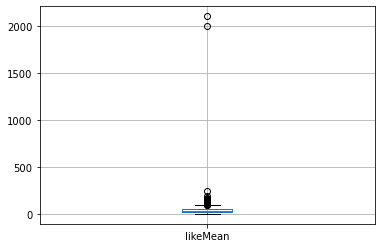

In [13]:
# display(df_posttime.boxplot(column=['likeMean']))
# display(df_posttime.sort_values(by=['likeMean'], ascending=False).head())


# df_posttime.drop([226,230], inplace = True)
display(df_posttime.boxplot(column=['likeMean']))
display(df_posttime.sort_values(by=['likeMean'], ascending=False).head())

In [14]:
df_posttime.isna().sum()
# df_posttime.plot.line(x='pubDate', y='likeMean')
# .groupby(pd.Grouper(freq='M'))
df_posttime.drop([226,230], inplace = True)
df_posttime = df_posttime.groupby(pd.Grouper(key="pubDate",freq='M')).sum().reset_index()

(0.0, 1000.0)

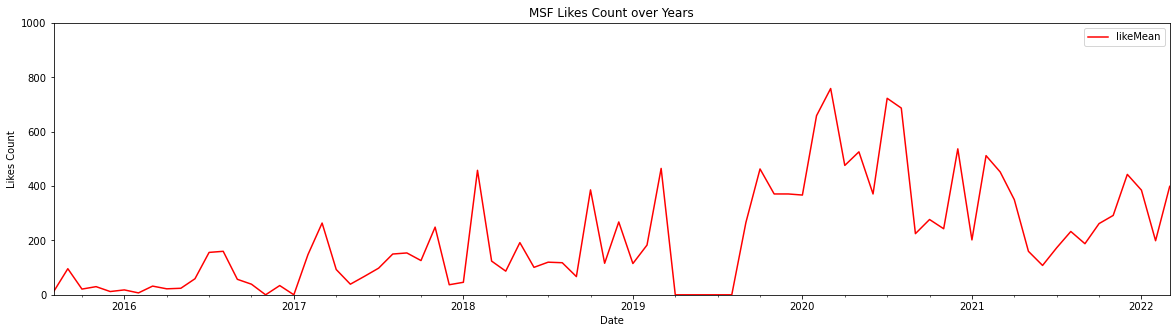

In [22]:
# df_posttime.plot(figsize=(15,4))
# df_posttime.plot(subplots=True, figsize=(15,6))
# df_posttime.plot(y=["likeMean", "ViewMean"], figsize=(15,4))
# df_posttime.plot(x="pubDate", y=["likeMean", "ViewMean"], style='.')
df_posttime.plot.line(x='pubDate', y=['likeMean'], figsize=(20,5), color = "r")
plt.title("MSF Likes Count over Years")
plt.xlabel("Date")
plt.ylabel("Likes Count")
plt.ylim ((0, 1000))

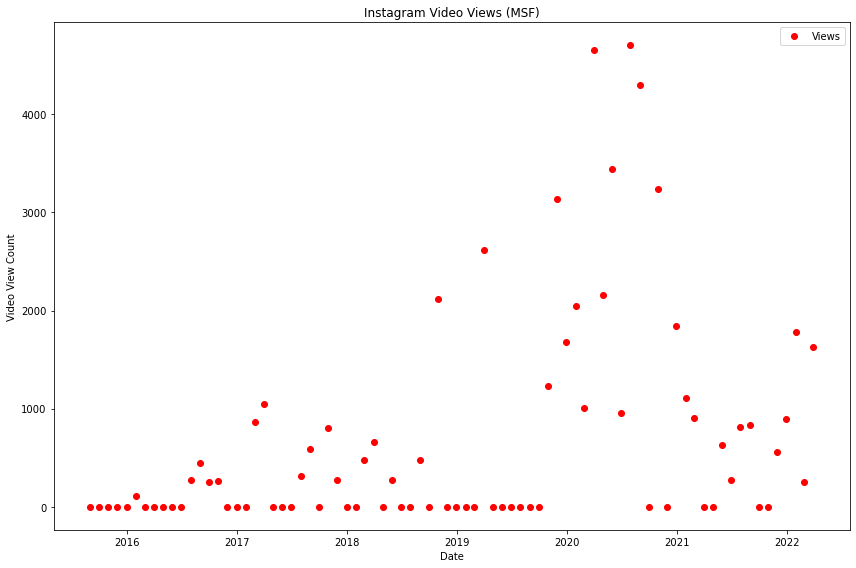

In [21]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(12, 8))
# plt.plot_date(df_posttime.pubDate, df_posttime.likeMean, label='Likes', linewidth=3)
plt.plot_date(df_posttime.pubDate, df_posttime.viewMean, label='Views', linewidth=3, color = "r")

plt.title('Instagram Video Views (MSF)')
plt.xlabel('Date')
plt.ylabel('Video View Count')

plt.legend()
plt.tight_layout()
plt.show()

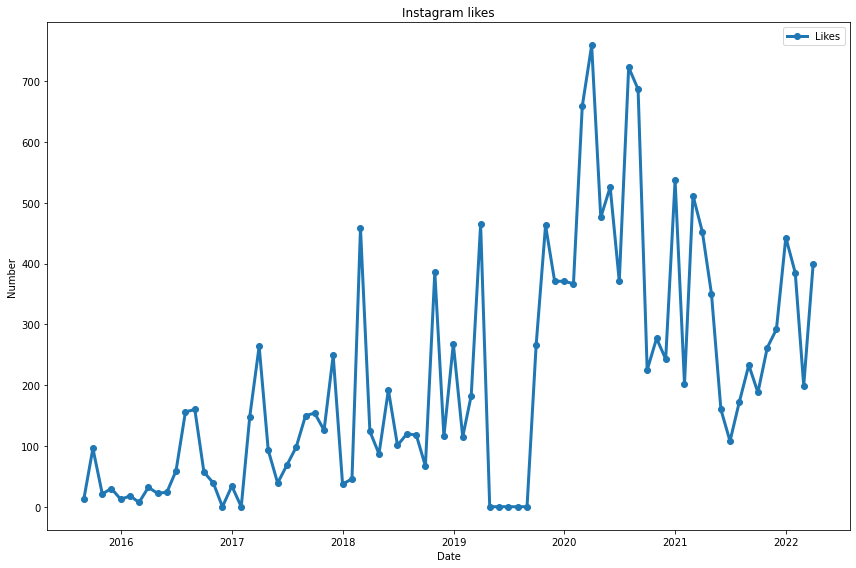

In [37]:
fig = plt.figure(figsize=(12, 8))
plt.plot_date(df_posttime.pubDate, df_posttime.likeMean,'-o', label='Likes', linewidth=3) #, '-o'
# plt.plot_date(df_posttime.pubDate, df_posttime.viewMean, label='Views', linewidth=3)

plt.title('Instagram likes')
plt.xlabel('Date')
plt.ylabel('Number')

plt.legend()
plt.tight_layout()
plt.show()

# Download all photos (Don't run first haha) #

In [38]:
# Download
statsDictionary["followerDp"] = followerDF["imgUrl"].tolist()
statsDictionary["followingDp"] = followingDF["imgUrl"].tolist()

print(f'Download check: {len(statsDictionary["followerDp"]) == len(statsDictionary["follower"])}')
print(f'Download check: {len(statsDictionary["followingDp"]) == len(statsDictionary["followering"])}')


Download check: (11698, 11698)
Download check: True


In [ ]:
# Download
for i in range(len(statsDictionary["followerDp"])):
    urllib.request.urlretrieve( statsDictionary["followerDp"][i], './photos/followers/{}.jpg'.format(statsDictionary["follower"][i]))

for i in range(len(statsDictionary["followingDp"])):
    urllib.request.urlretrieve( statsDictionary["followingDp"][i], './photos/followerings/{}.jpg'.format(statsDictionary["followering"][i]))

